# NetworkX Graphs
# 1. Graph Types

[1. Undirected Graphs](#1)

[1a. Bipartite Graphs](#1a)

[1b. Examples of Undirected Graphs](#1b)

[1c. Coloring](#1c)

[2. Directed Graphs](#2)

[3. Trees](#3)

[3.1 Undirected Trees](#3.1)

[3.2 Directed Trees](#3.2)

[4. Weighted Graphs](#4)

[5. Multigraphs](#5)

[5.1 Undirected Multigraphs](#5.1)

[5.2 Directed Multigraphs](#5.2)

[6. Graph Isomorphisms](#6)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import random
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph 
from IPython.display import Image
from IPython.core.display import HTML 

<a id='1'></a>
## 1. Undirected Graphs

In [2]:
# Empty Graph

G = nx.Graph()

In [3]:
# Add edges (links) from list ([ , , , ])

G.add_edges_from([(0,1),(1,2),(1,4),(2,3),(3,4),(0,4)])

In [4]:
# List of vertices (nodes) and their size

print G.nodes()
print len(G.nodes())

[0, 1, 2, 3, 4]
5


In [5]:
# List of edges (links) and their size

print G.edges()
print len(G.edges())

[(0, 1), (0, 4), (1, 2), (1, 4), (2, 3), (3, 4)]
6


In [6]:
# Graph type

print type(G)
G.is_directed()

<class 'networkx.classes.graph.Graph'>


False

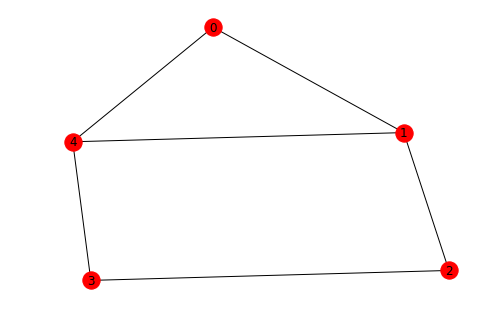

In [7]:
# Graph plot

nx.draw(G,with_labels=True)
# nx.draw(G,with_labels=True,node_color="b",edge_color="g")

Colors:

* Red: "red" or "r"
* Blue: "blue" or "b"
* Green: "green" or "g"

Color Picker: 
https://www.w3schools.com/colors/colors_picker.asp

* Light red: "#ffb3b3"
* Light green: "#b3ffb3"
* Light blue: "#b3ecff"

In [8]:
# Simple graph plot 

def pcplot(G,pos,node_color,edge_color,node_border_color,figsize):
    plt.figure(figsize=figsize);
    nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
    nodes.set_edgecolor(node_border_color)
    nx.draw_networkx_edges(G, pos, edge_color=edge_color)
    nx.draw_networkx_labels(G, pos)
    plt.axis('off');

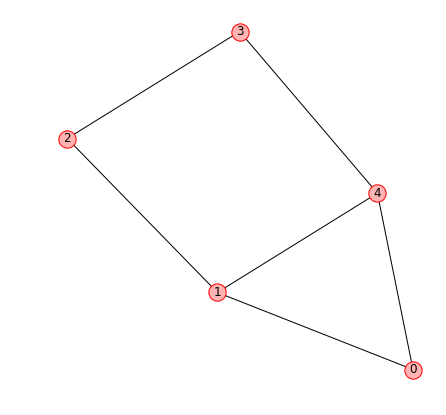

In [9]:
pos = nx.spring_layout(G)
node_color="#ffb3b3"
edge_color="k"
node_border_color="r"
figsize=(7,7)

pcplot(G,pos,node_color,edge_color,node_border_color,figsize)

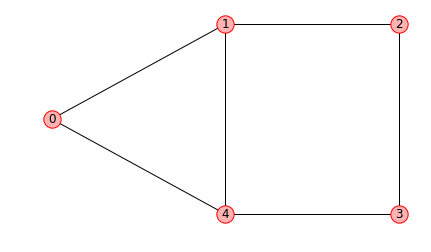

In [10]:
# Graph plot with predifined layout of nodes

pos1={
    0:(0,1),
    1:(1,2),
    2:(2,2),
    3:(2,0),
    4:(1,0)
}

pos=pos1
figsize=(7,4)

pcplot(G,pos,node_color,edge_color,node_border_color,figsize)

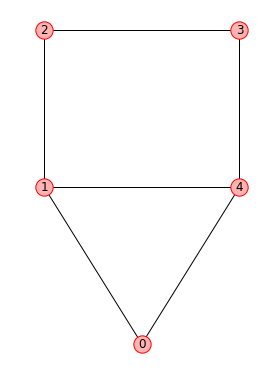

In [11]:
# Another predefined layout

pos2={
    0:(1,0),
    1:(0,1),
    2:(0,2),
    3:(2,2),
    4:(2,1)
}

pos=pos2
figsize=(4,6.5)

pcplot(G,pos,node_color,edge_color,node_border_color,figsize)

<a id='1a'></a>
### 1a. Bipartite Graphs

* **A graph is bipartite if its nodes are partitioned in two sets and there are no links inside each set.**
* **A graph is bipartite if and only if it does not contain any odd-length cycles.**
* **Every tree is bipartite**
* **A bipartite graph is tree if and only if it does not contain any even-length cycles.**

['a', 1, 'c', 'b', 'd', 2, 3] 7
[('a', 1), (1, 'c'), (1, 'd'), ('c', 2), ('b', 2), ('d', 3)] 6
Is H directed? False
Is H bipartite? True
Is H tree? True


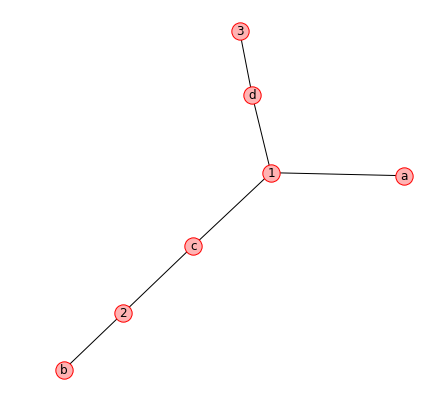

In [12]:
H=nx.Graph()
H.add_edges_from([(1,"a"),(1,"c"),(1,"d"),(2,"b"),(2,"c"),(3,"d")])

print H.nodes(), len(H.nodes())
print H.edges(), len(H.edges())

print "Is H directed?", H.is_directed()
print "Is H bipartite?", nx.is_bipartite(H)
print "Is H tree?", nx.is_tree(H)

pos = nx.spring_layout(H)
figsize=(7,7)

pcplot(H,pos,node_color,edge_color,node_border_color,figsize)

['a', 1, 'c', 'b', 'd', 2, 3] 7
[('a', 1), (1, 'c'), (1, 'b'), (1, 'd'), ('c', 2), ('b', 2), ('d', 3)] 7
Is H directed? False
Is H bipartite? True
Is H tree? False


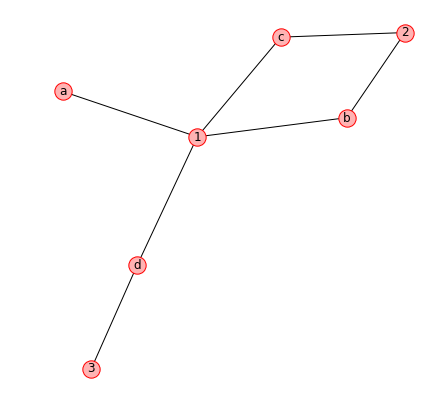

In [13]:
H.add_edge(1,"b")

print H.nodes(), len(H.nodes())
print H.edges(), len(H.edges())

print "Is H directed?", H.is_directed()
print "Is H bipartite?", nx.is_bipartite(H)
print "Is H tree?", nx.is_tree(H)

pos = nx.spring_layout(H)
figsize=(7,7)

pcplot(H,pos,node_color,edge_color,node_border_color,figsize)

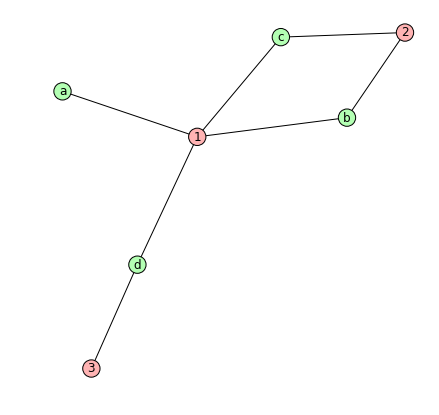

In [14]:
bipartition={1:"#ffb3b3",2:"#ffb3b3",3:"#ffb3b3",'a':"#b3ffb3",'b':"#b3ffb3",'c':"#b3ffb3",'d':"#b3ffb3"}
node_color=[bipartition[n] for n in H.nodes()]
node_border_color='k'

pcplot(H,pos,node_color,edge_color,node_border_color,figsize)

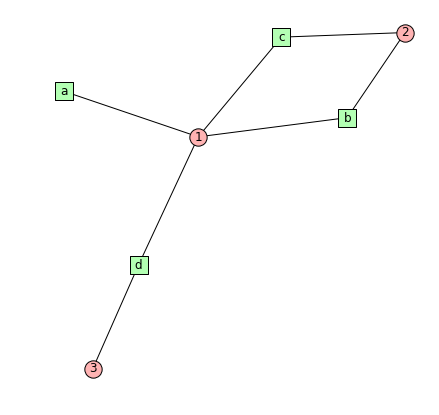

In [15]:
plt.figure(figsize=figsize);
nodes1 = nx.draw_networkx_nodes(H, pos, nodelist=[1,2,3],node_color="#ffb3b3",node_shape='o')
nodes2 = nx.draw_networkx_nodes(H, pos, nodelist=['a','b','c','d'],node_color="#b3ffb3",node_shape='s')
nodes1.set_edgecolor('k')
nodes2.set_edgecolor('k')
nx.draw_networkx_edges(H, pos)
nx.draw_networkx_labels(H, pos)
plt.axis('off');

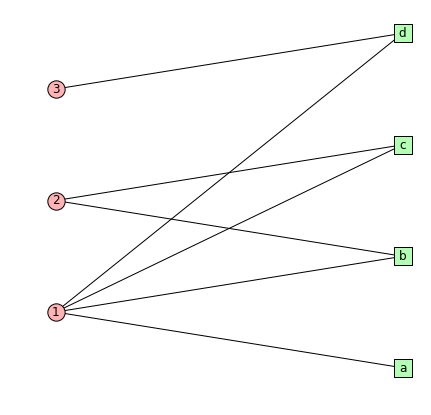

In [16]:
pos3={1:(0,0.5),2:(0,1.5),3:(0,2.5),'a':(1,0),'b':(1,1),'c':(1,2),'d':(1,3)}
pos=pos3
plt.figure(figsize=figsize);
nodes1 = nx.draw_networkx_nodes(H, pos, nodelist=[1,2,3],node_color="#ffb3b3",node_shape='o')
nodes2 = nx.draw_networkx_nodes(H, pos, nodelist=['a','b','c','d'],node_color="#b3ffb3",node_shape='s')
nodes1.set_edgecolor('k')
nodes2.set_edgecolor('k')
nx.draw_networkx_edges(H, pos)
nx.draw_networkx_labels(H, pos)
plt.axis('off');

<a id='1b'></a>
### 1b. Examples of Undirected Graphs

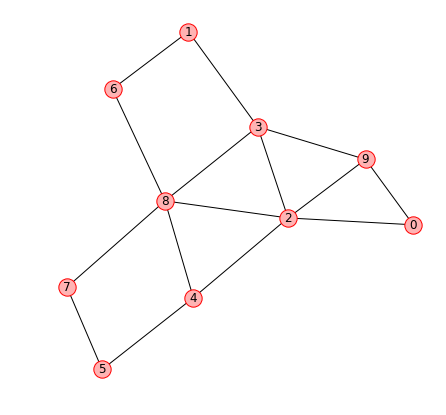

In [17]:
# Networkx graph generators: 
# https://networkx.github.io/documentation/networkx-2.0/reference/generators.html

number_of_nodes = 10
number_of_edges = 15

# G=nx.gnm_random_graph(number_of_nodes,number_of_edges)

while True:
    G=nx.gnm_random_graph(number_of_nodes,number_of_edges)  
    if nx.number_connected_components(G)==1:
        break

pos = nx.spring_layout(G)
node_color="#ffb3b3"
edge_color="k"
node_border_color="r"
figsize=(7,7)

pcplot(G,pos,node_color,edge_color,node_border_color,figsize)

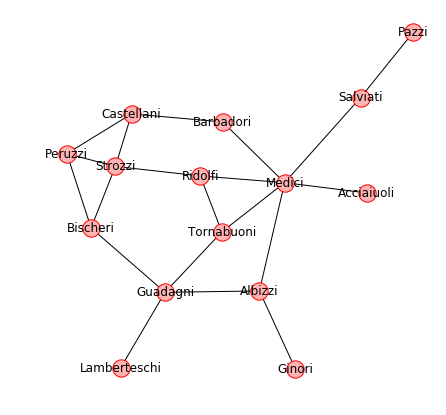

In [18]:
G=nx.florentine_families_graph()
pos = nx.spring_layout(G)
pcplot(G,pos,node_color,edge_color,node_border_color,figsize)

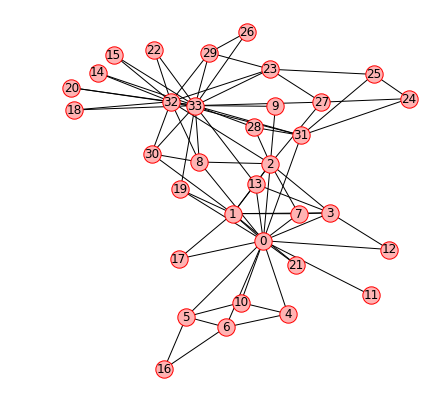

In [19]:
G=nx.karate_club_graph()
pos = nx.spring_layout(G)
pcplot(G,pos,node_color,edge_color,node_border_color,figsize)

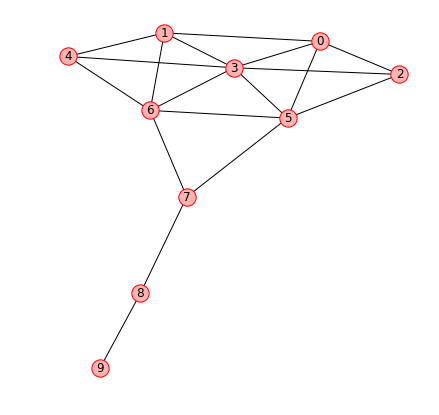

In [20]:
G=nx.krackhardt_kite_graph()
pos = nx.spring_layout(G)
pcplot(G,pos,node_color,edge_color,node_border_color,figsize)

18 women:
['Theresa Anderson', 'Helen Lloyd', 'Flora Price', 'Katherina Rogers', 'Nora Fayette', 'Sylvia Avondale', 'Verne Sanderson', 'Olivia Carleton', 'Eleanor Nye', 'Brenda Rogers', 'Frances Anderson', 'Dorothy Murchison', 'Ruth DeSand', 'Laura Mandeville', 'Evelyn Jefferson', 'Charlotte McDowd', 'Myra Liddel', 'Pearl Oglethorpe']
14 events:
['E11', 'E10', 'E13', 'E12', 'E14', 'E9', 'E8', 'E5', 'E4', 'E7', 'E6', 'E1', 'E3', 'E2']


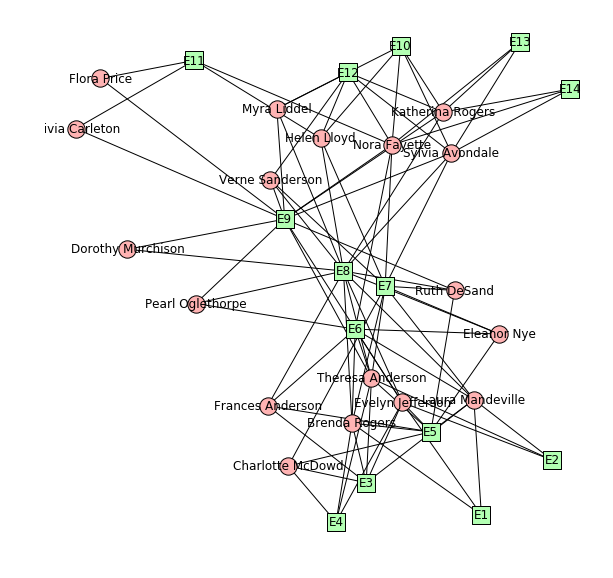

In [21]:
G=nx.davis_southern_women_graph()

from networkx.algorithms import bipartite
women=list(bipartite.sets(G)[0])
events=list(bipartite.sets(G)[1])
print len(women), 'women:'
print women
print len(events), 'events:'
print events

pos = nx.spring_layout(G)
plt.figure(figsize=(10,10));
nodes1 = nx.draw_networkx_nodes(G, pos, nodelist=women,node_color="#ffb3b3",node_shape='o')
nodes2 = nx.draw_networkx_nodes(G, pos, nodelist=events,node_color="#b3ffb3",node_shape='s')
nodes1.set_edgecolor('k')
nodes2.set_edgecolor('k')
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

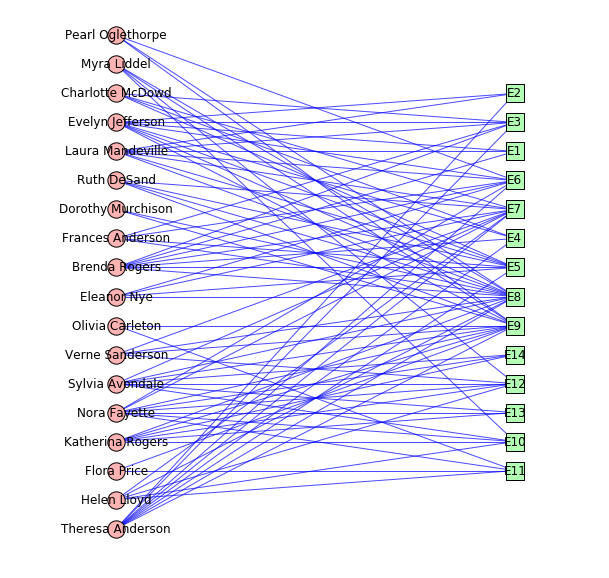

In [22]:
posdw={}
for i,n in enumerate(women):
    posdw[n]=(0,i)
for i,n in enumerate(events):
    posdw[n]=(1,2+i)
pos=posdw
H=G
plt.figure(figsize=(10,10));
nodes1 = nx.draw_networkx_nodes(H, pos, nodelist=women,node_color="#ffb3b3",node_shape='o')
nodes2 = nx.draw_networkx_nodes(H, pos, nodelist=events,node_color="#b3ffb3",node_shape='s')
nodes1.set_edgecolor('k')
nodes2.set_edgecolor('k')
nx.draw_networkx_edges(H, pos,edge_color='b',alpha=0.7)
# yoffset = {}
# y_off = -0.3  # offset on the y axis
# for k, v in pos.items():
#     yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(H, pos) #yoffset)
plt.xlim(-0.2,1.2)
plt.axis('off');

<a id='1c'></a>
### 1c. Coloring

Chromatic number = 3


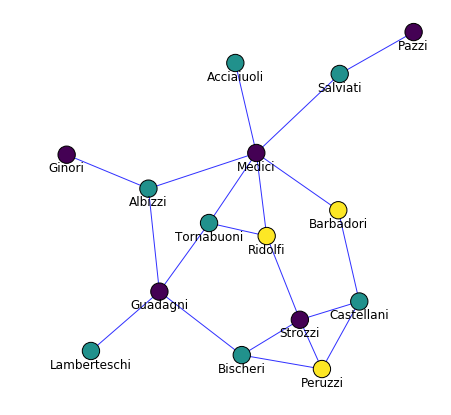

In [23]:
G=nx.florentine_families_graph()
d = nx.coloring.greedy_color(G, strategy='largest_first')
print 'Chromatic number =', len(set(d.values()))

pos = nx.spring_layout(G)
plt.figure(figsize=(7,7));
node_color=[d[n] for n in G.nodes()]
node_border_color='k'
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos,edge_color='b',alpha=0.8)
plt.axis('off');
yoffset = {}
y_off = -0.07  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset);

Chromatic number = 5


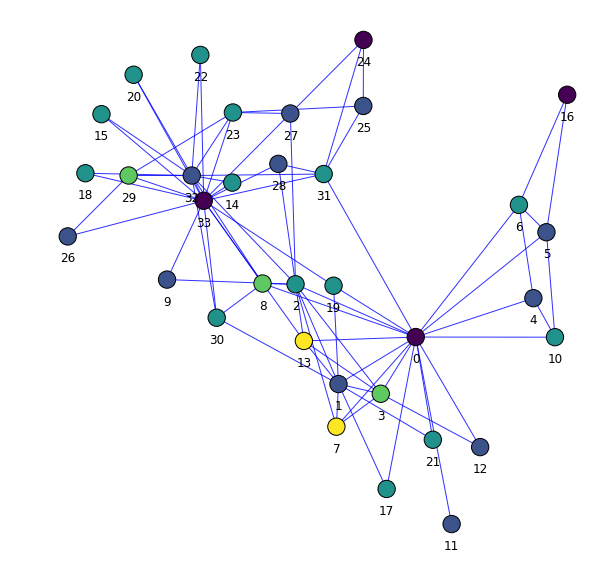

In [24]:
G=nx.karate_club_graph()
d = nx.coloring.greedy_color(G, strategy='largest_first')
print 'Chromatic number =', len(set(d.values()))

pos = nx.spring_layout(G)
plt.figure(figsize=(10,10));
node_color=[d[n] for n in G.nodes()]
node_border_color='k'
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color) 
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos,edge_color='b',alpha=0.8)
plt.axis('off');
yoffset = {}
y_off = -0.07  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset);

Chromatic number = 2


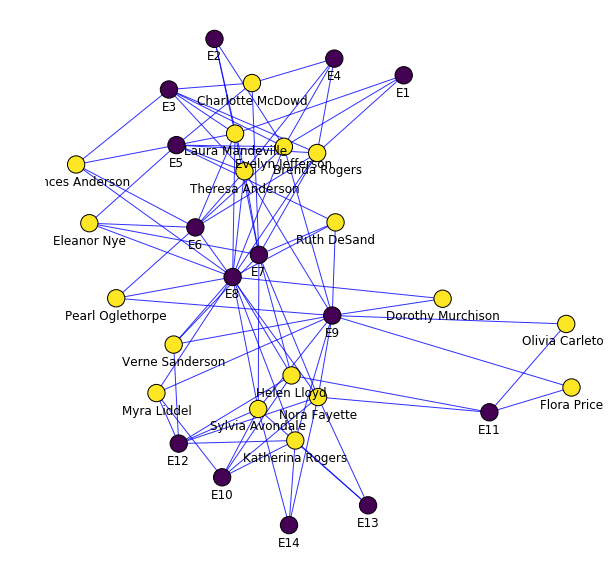

In [25]:
G=nx.davis_southern_women_graph()
d = nx.coloring.greedy_color(G, strategy='largest_first')
print 'Chromatic number =', len(set(d.values()))

pos = nx.spring_layout(G)
plt.figure(figsize=(10,10));
node_color=[d[n] for n in G.nodes()]
node_border_color='k'
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color) 
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos,edge_color='b',alpha=0.8)
plt.axis('off');
yoffset = {}
y_off = -0.07  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset);

Chromatic number = 4


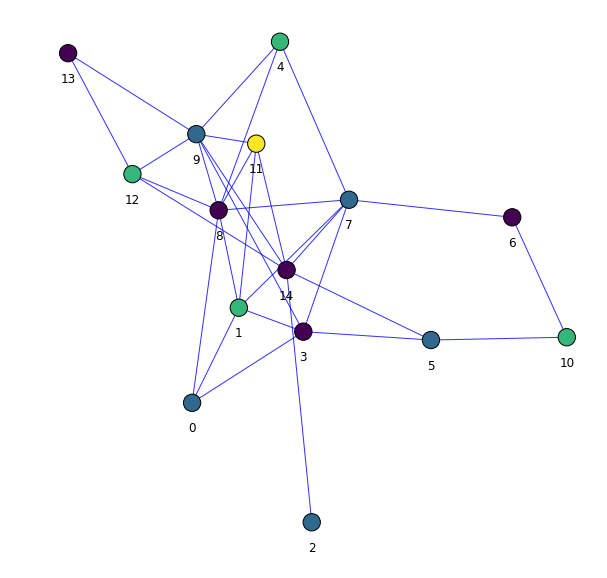

In [26]:
number_of_nodes = 15
number_of_edges = 30

# G=nx.gnm_random_graph(number_of_nodes,number_of_edges)

while True:
    G=nx.gnm_random_graph(number_of_nodes,number_of_edges)  
    d = nx.coloring.greedy_color(G, strategy='largest_first')
    if nx.number_connected_components(G)==1: 
        break
        
# d = nx.coloring.greedy_color(G, strategy='largest_first')
print 'Chromatic number =', len(set(d.values()))

pos = nx.spring_layout(G)
plt.figure(figsize=(10,10));
node_color=[d[n] for n in G.nodes()]
node_border_color='k'
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color) 
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos,edge_color='b',alpha=0.8)
plt.axis('off');
yoffset = {}
y_off = -0.06  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset);

<a id='2'></a>
## 2. Directed Graphs

[0, 1, 2, 3, 4, 5, 6] 7
[(0, 4), (1, 3), (1, 5), (2, 0), (2, 4), (2, 5), (2, 6), (3, 1), (4, 1), (4, 2), (5, 2), (5, 4), (5, 6), (6, 3), (6, 5)] 15
Is G directed? True
Is G bipartite? False
Is G tree? False


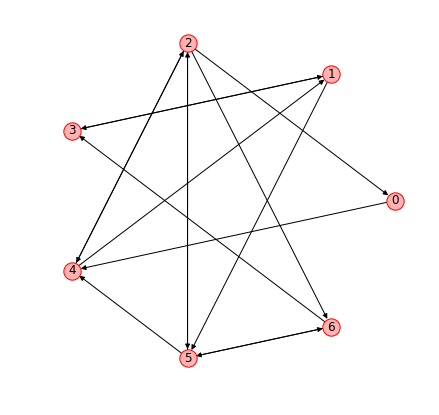

In [27]:
number_of_nodes = 7
number_of_edges = 15

# G=nx.gnm_random_graph(number_of_nodes,number_of_edges,directed=True)

while True:
    G=nx.gnm_random_graph(number_of_nodes,number_of_edges,directed=True)  
    if nx.number_weakly_connected_components(G)==1:
        break

print G.nodes(), len(G.nodes())
print G.edges(), len(G.edges())

print "Is G directed?", G.is_directed()
print "Is G bipartite?", nx.is_bipartite(G)
print "Is G tree?", nx.is_tree(G)

pos = nx.circular_layout(G) #nx.spring_layout(G)
node_color="#ffb3b3"
edge_color="k"
node_border_color="r"
figsize=(7,7)

pcplot(G,pos,node_color,edge_color,node_border_color,figsize)

[0, 1, 2, 3, 4, 5] 6
[(0, 1), (0, 2), (0, 5), (1, 0), (1, 2), (1, 3), (1, 4), (3, 5)] 8
Is G directed? True
Is G bipartite? False
Is G tree? False


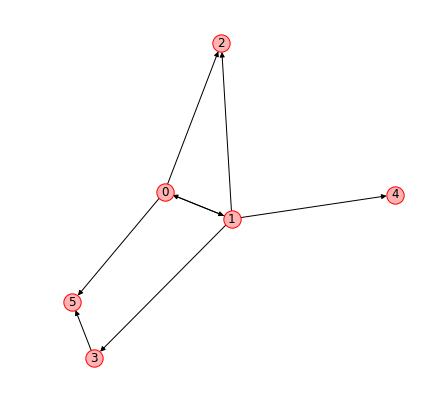

In [28]:
G=nx.DiGraph()
G.add_edges_from([(0,1),(0,2),(0,5),(1,0),(1,2),(1,3),(1,4),(3,5)])

print G.nodes(), len(G.nodes())
print G.edges(), len(G.edges())

print "Is G directed?", G.is_directed()
print "Is G bipartite?", nx.is_bipartite(G)
print "Is G tree?", nx.is_tree(G)

pos = nx.spring_layout(G) # nx.circular_layout(G)
node_color="#ffb3b3"
edge_color="k"
node_border_color="r"
figsize=(7,7)

pcplot(G,pos,node_color,edge_color,node_border_color,figsize)

[0, 1, 2, 3, 4, 5] 6
[(0, 1), (0, 5), (1, 2), (1, 3), (1, 4)] 5
Is G directed? True
Is G bipartite? True
Is G tree? True


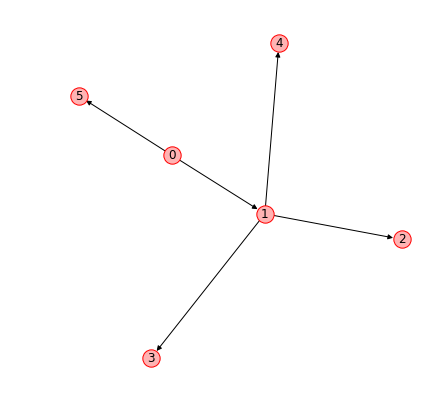

In [29]:
G=nx.DiGraph()
G.add_edges_from([(0,1),(0,5),(1,2),(1,3),(1,4)])

print G.nodes(), len(G.nodes())
print G.edges(), len(G.edges())

print "Is G directed?", G.is_directed()
print "Is G bipartite?", nx.is_bipartite(G)
print "Is G tree?", nx.is_tree(G)

pos = nx.spring_layout(G) # nx.circular_layout(G)
node_color="#ffb3b3"
edge_color="k"
node_border_color="r"
figsize=(7,7)

pcplot(G,pos,node_color,edge_color,node_border_color,figsize)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 10
[(1, 0), (1, 9), (1, 7), (2, 0), (2, 9), (2, 3), (3, 2), (3, 5), (3, 7), (4, 8), (4, 1), (4, 7), (6, 0), (6, 5), (6, 7), (7, 0), (7, 1), (7, 6), (7, 8), (9, 2)] 20
Is G directed? True
Is G bipartite? False
Is G tree? False


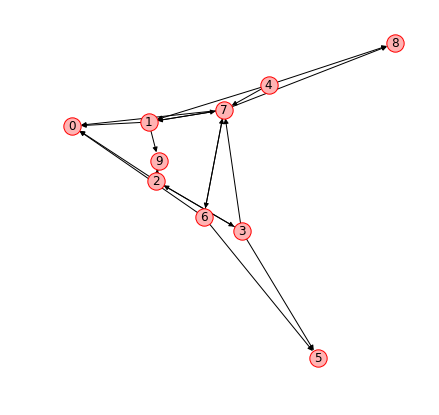

In [30]:
number_of_nodes = 10
number_of_edges = 20

# G=nx.gnm_random_graph(number_of_nodes,number_of_edges,directed=True)

while True:
    G=nx.gnm_random_graph(number_of_nodes,number_of_edges,directed=True)  
    if nx.number_weakly_connected_components(G)==1:
        break

print G.nodes(), len(G.nodes())
print G.edges(), len(G.edges())

print "Is G directed?", G.is_directed()
print "Is G bipartite?", nx.is_bipartite(G)
print "Is G tree?", nx.is_tree(G)

pos = nx.spring_layout(G) # nx.circular_layout(G) 
node_color="#ffb3b3"
edge_color="k"
node_border_color="r"
figsize=(7,7)

pcplot(G,pos,node_color,edge_color,node_border_color,figsize)

In [31]:
# Reciprocating edges

rece=[]
for e in G.edges():
    if (e[1],e[0]) in G.edges():
        if (e[1],e[0]) not in rece:
            rece.append(e)

print len(rece), "reciprocating edges:"           
rece

4 reciprocating edges:


[(1, 7), (2, 9), (2, 3), (6, 7)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 10
[(0, 2), (0, 4), (1, 2), (1, 7), (2, 1), (2, 4), (2, 7), (3, 2), (3, 6), (3, 7), (4, 0), (4, 5), (5, 1), (5, 4), (5, 7), (6, 9), (7, 0), (7, 8), (7, 5), (8, 7)] 20
Is G directed? True
Is G bipartite? False
Is G tree? False
5 reciprocating edges:
[(0, 4), (1, 2), (4, 5), (5, 7), (7, 8)]


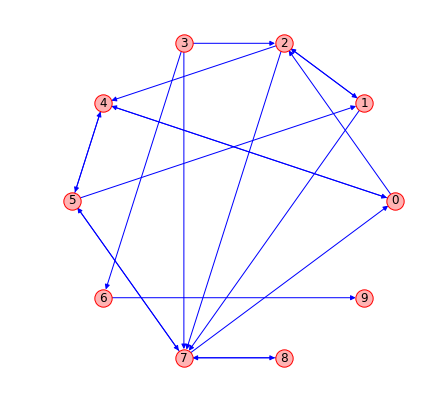

In [32]:
number_of_nodes = 10
number_of_edges = 20

# G=nx.gnm_random_graph(number_of_nodes,number_of_edges,directed=True)

while True:
    G=nx.gnm_random_graph(number_of_nodes,number_of_edges,directed=True)  
    rece=[]
    for e in G.edges():
        if (e[1],e[0]) in G.edges():
            if (e[1],e[0]) not in rece:
                rece.append(e)
    if nx.number_weakly_connected_components(G)==1 and len(rece)>4:
        break

print G.nodes(), len(G.nodes())
print G.edges(), len(G.edges())

print "Is G directed?", G.is_directed()
print "Is G bipartite?", nx.is_bipartite(G)
print "Is G tree?", nx.is_tree(G)

rece=[]
for e in G.edges():
    if (e[1],e[0]) in G.edges():
        if (e[1],e[0]) not in rece:
            rece.append(e)
print len(rece), "reciprocating edges:"           
print rece

# pos = nx.spring_layout(G) 
pos = nx.circular_layout(G) 

node_color="#ffb3b3"
edge_color="b"
node_border_color="r"
figsize=(7,7)

pcplot(G,pos,node_color,edge_color,node_border_color,figsize)

<a id='3'></a>
## 3. Trees

<a id='3.1'></a>
### 3.1 Undirected Trees

**An undirected graph is a tree if it is acyclic and connected.**

#### Balanced Tree

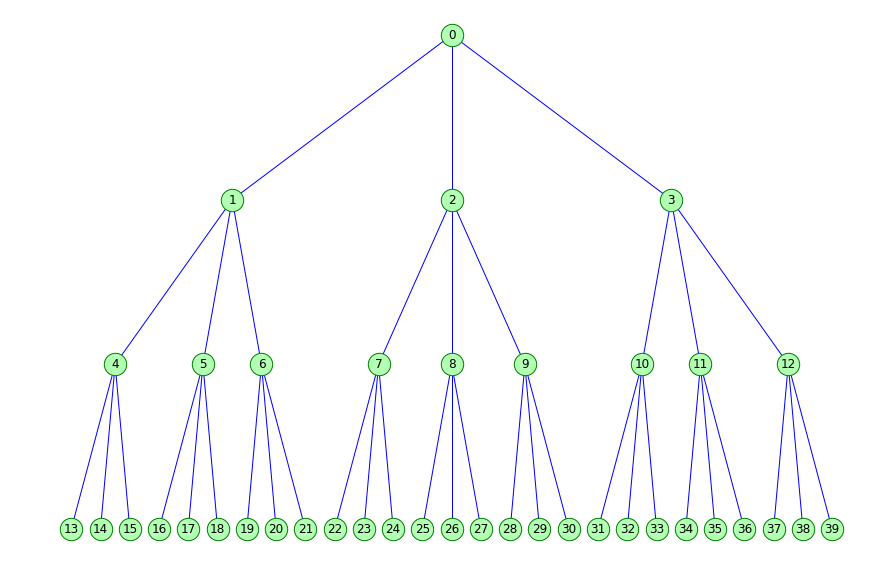

In [33]:
r=3
h=3
T=nx.balanced_tree(r, h)

pos=graphviz_layout(T, prog='dot')
plt.figure(figsize=(15,10));
node_color="#b3ffb3" #"#ffb3b3"
node_border_color='g' #'r'
edge_color="b" #"#668cff"
nodes = nx.draw_networkx_nodes(T, pos, node_color=node_color,node_size=500)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(T, pos, edge_color=edge_color)
nx.draw_networkx_labels(T, pos)
# nx.draw(T, pos, arrows=False)
plt.axis('off');

#### Random Tree

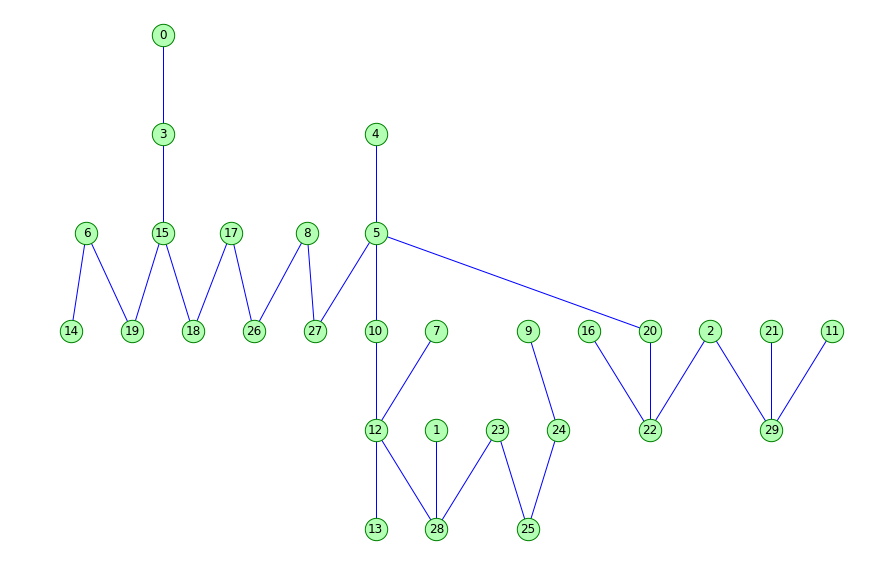

In [34]:
T=nx.random_tree(30)

pos=graphviz_layout(T, prog='dot')
plt.figure(figsize=(15,10));
nodes = nx.draw_networkx_nodes(T, pos, node_color=node_color,node_size=500)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(T, pos, edge_color=edge_color)
nx.draw_networkx_labels(T, pos)
# nx.draw(T, pos, arrows=False)
plt.axis('off');

#### Random Power Law Tree

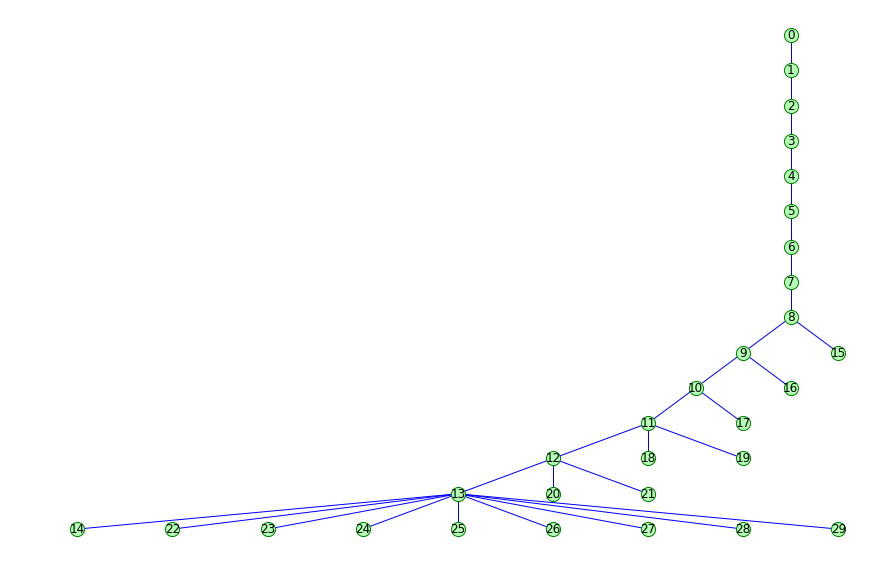

In [35]:
T=nx.random_powerlaw_tree(30,tries=1000)

pos=graphviz_layout(T, prog='dot')
plt.figure(figsize=(15,10));
nodes = nx.draw_networkx_nodes(T, pos, node_color=node_color,node_size=200)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(T, pos, edge_color=edge_color)
nx.draw_networkx_labels(T, pos)
# nx.draw(T, pos, arrows=False)
plt.axis('off');

<a id='3.2'></a>
### 3.2 Directed Trees

**A directed tree is a directed graph which would be a tree if the directions on the edges were ignored. In other words, a directed tree is a weakly connected directed graph such that the underlying undirected graph is a tree.**

Directed tree
Not arborescence


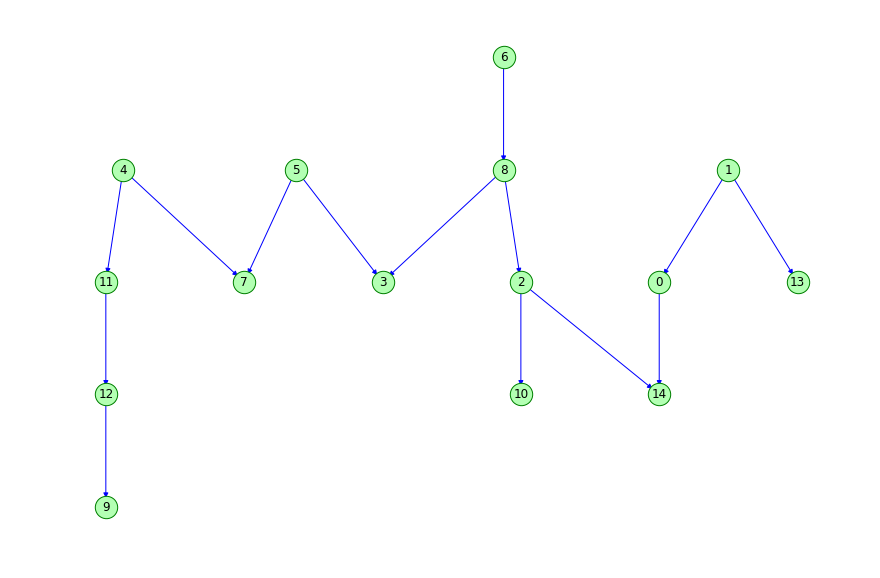

In [36]:
while True:
    T=nx.random_tree(15)
    S=nx.DiGraph()   
    eds = list(T.edges())
    for _ in range(5):
        e=random.choice(eds)
        for n, i in enumerate(eds):
            if i == e:
                eds[n] = (e[1],e[0])
    S.add_edges_from(eds)
    if nx.is_weakly_connected(S)==True:
        print "Directed tree"
        break
if nx.is_arborescence(S)==True:
    print "Arborescence"
else:
    print "Not arborescence"
pos=graphviz_layout(S, prog='dot')
plt.figure(figsize=(15,10));
nodes = nx.draw_networkx_nodes(S, pos, node_color=node_color,node_size=500)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(S, pos, edge_color=edge_color)
nx.draw_networkx_labels(S, pos)
plt.axis('off');

#### Arborescences

**An arborescence is a directed graph in which, for a vertex u called the root and any other vertex v, there is exactly one directed path from u to v.**

Arborescence


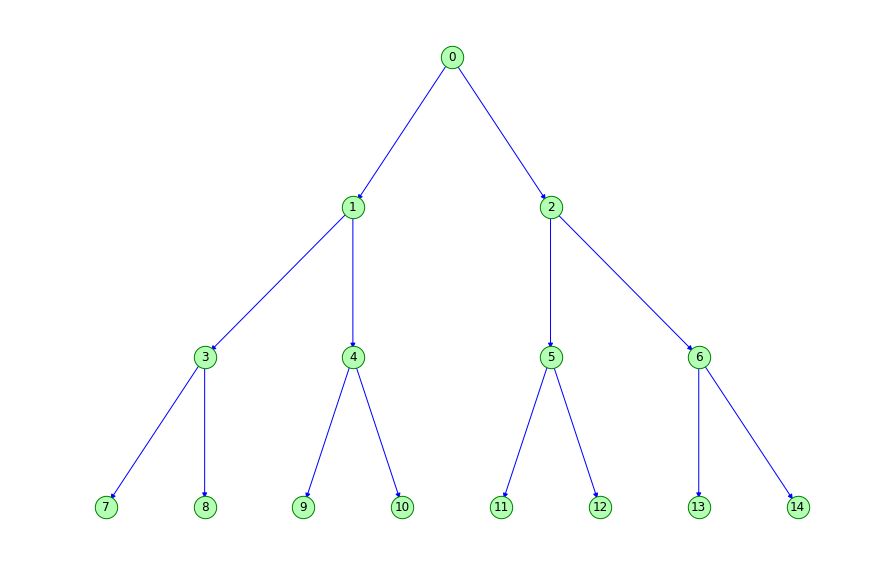

In [37]:
T=nx.balanced_tree(2, 3)
S=nx.DiGraph()
S.add_edges_from(T.edges())
if nx.is_arborescence(S)==True:
    print "Arborescence"
pos=graphviz_layout(S, prog='dot')
plt.figure(figsize=(15,10));
nodes = nx.draw_networkx_nodes(S, pos, node_color=node_color,node_size=500)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(S, pos, edge_color=edge_color)
nx.draw_networkx_labels(S, pos)
plt.axis('off');

Arborescence


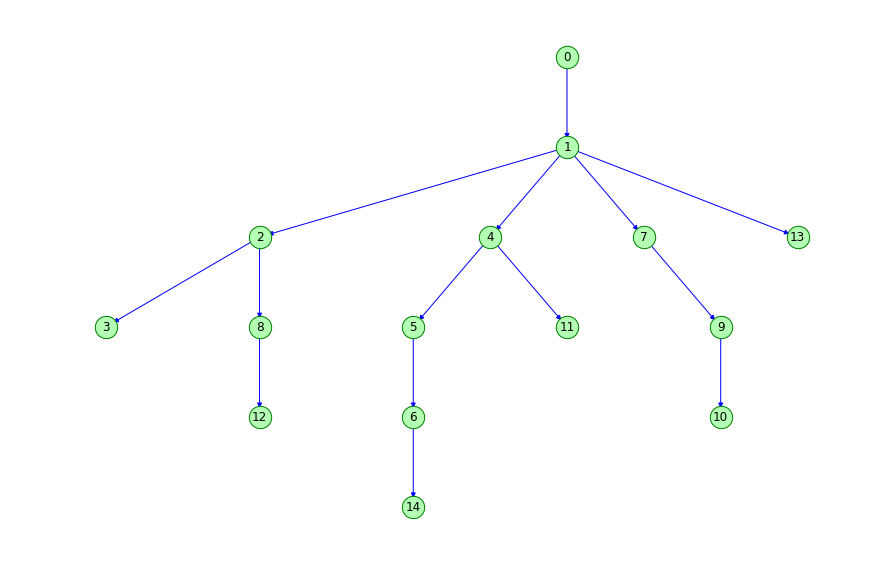

In [38]:
while True:
    T=nx.random_tree(15)
    S=nx.DiGraph()
    S.add_edges_from(T.edges())
    if nx.is_arborescence(S)==True:
        print "Arborescence"
        break
pos=graphviz_layout(S, prog='dot')
plt.figure(figsize=(15,10));
nodes = nx.draw_networkx_nodes(S, pos, node_color=node_color,node_size=500)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(S, pos, edge_color=edge_color)
nx.draw_networkx_labels(S, pos)
plt.axis('off');

<a id='4'></a>
## 4. Weighted Graphs

**Weighted (undirected or directed) graphs are graphs in which each edge posses a numerical attribute, called weight (or value).**

In [39]:
weight={
    (0,1):2, 
    (1,2):1, 
    (2,0):3
        }
w_edges=[(x,y,z) for (x,y),z in weight.items()]
G = nx.Graph()
# G = nx.DiGraph()
G.add_weighted_edges_from(w_edges)

print G.nodes(), len(G.nodes())
print G.edges(data=True), len(G.edges())

print "Is G weighted?", nx.is_weighted(G)
print "Is G directed?", G.is_directed()

[0, 1, 2] 3
[(0, 1, {'weight': 2}), (0, 2, {'weight': 3}), (1, 2, {'weight': 1})] 3
Is G weighted? True
Is G directed? False


In [40]:
# Weighted graph plot 

def wpcplot(G,pos,node_color,edge_color,node_border_color,edge_width,elabels,figsize):
    plt.figure(figsize=figsize);
    nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
    nodes.set_edgecolor(node_border_color)
    nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
    plt.axis('off');

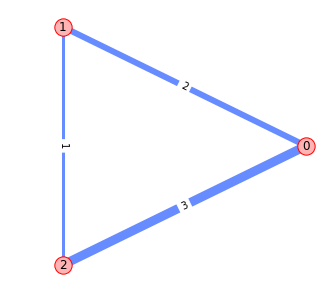

In [41]:
elabels={}
elabels = nx.get_edge_attributes(G,'weight')
edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[3*w for w in edge_width]

node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
pos=nx.circular_layout(G) 
figsize=(5,5)

wpcplot(G,pos,node_color,edge_color,node_border_color,edge_width,elabels,figsize)

<a id='5'></a>
## 5. Multigraphs

**Multigraphs are graphs in which a pair of nodes might hold more than one edge (multiple edges).**

In [42]:
# Select whether you want an undirected or directed multigraph 
# by commenting out the unwanted case:

# G = nx.MultiGraph()
G = nx.MultiDiGraph()

G.add_edges_from([(0,1),(1,2),(2,0),(0,1),(0,1),(1,2)])

print G.nodes(), len(G.nodes())
print G.edges(), len(G.edges())

print "Is G multigraph?", G.is_multigraph()
print "Is G weighted?", nx.is_weighted(G)
print "Is G directed?", G.is_directed()

[0, 1, 2] 3
[(0, 1), (0, 1), (0, 1), (1, 2), (1, 2), (2, 0)] 6
Is G multigraph? True
Is G weighted? False
Is G directed? True


### Converting a multigraph to a weighted graph and plotting it

Is Gw multigraph? False
Is Gw weighted? True
Is Gw directed? True
[(0, 1, {'weight': 3}), (1, 2, {'weight': 2}), (2, 0, {'weight': 1})]


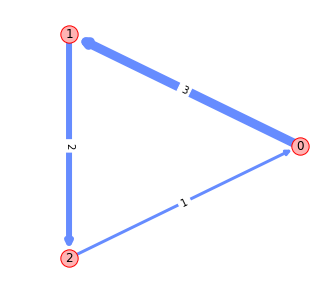

In [43]:
if G.is_directed()==False:
    weight={(x,y):v for (x, y), v in Counter(G.edges()).items()}
    w_edges=[(x,y,z) for (x,y),z in weight.items()]
    Gw = nx.Graph()
    Gw.add_weighted_edges_from(w_edges)
    edge_width=[Gw[u][v]['weight'] for u,v in Gw.edges()]
else:
    weight=[(x, y, {'weight': v}) for (x, y), v in Counter(G.edges()).items()]
    Gw = nx.DiGraph(weight)
    edge_width=[Gw[u][v]['weight'] for u,v in Gw.edges()] 

print "Is Gw multigraph?", Gw.is_multigraph()
print "Is Gw weighted?", nx.is_weighted(Gw)
print "Is Gw directed?", Gw.is_directed()

# elabels={}
elabels = nx.get_edge_attributes(Gw,'weight')
print weight
edge_width=[3*w for w in edge_width]
pos=nx.circular_layout(Gw) 
figsize=(5,5)

wpcplot(Gw,pos,node_color,edge_color,node_border_color,edge_width,elabels,figsize)

<a id='5.1'></a>
### 5.1 Random (gnm-based) UNDIRECTED Multigraphs

In [44]:
number_of_nodes = 10
number_of_edges = 25

# G=nx.gnm_random_graph(number_of_nodes,number_of_edges,directed=False)

while True:
    G=nx.gnm_random_graph(number_of_nodes,number_of_edges,directed=False) 
    if nx.number_connected_components(G)==1:
        break

print len(G.nodes()),len(G.edges())
if G.is_directed()==True:
    print "Directed graph"
else:
    print "Undirected graph"

10 25
Undirected graph


In [45]:
# Number of additional multiedges:
k=10

edges = list(G.edges())
for _ in range(k):
    e=random.choice(list(G.edges()))
    edges.append(e)

Gm = nx.MultiGraph()

Gm.add_edges_from(edges)

print len(Gm.nodes()), len(Gm.edges())  

print "Is Gm multigraph?", Gm.is_multigraph()
print "Is Gm weighted?", nx.is_weighted(Gm)
print "Is Gm directed?", Gm.is_directed()

10 35
Is Gm multigraph? True
Is Gm weighted? False
Is Gm directed? False


Is Gw multigraph? False
Is Gw weighted? True
Is Gw directed? False
(4, 7) 1
(4, 8) 1
(5, 6) 1
(2, 8) 3
(6, 9) 2
(1, 6) 2
(3, 7) 3
(0, 3) 1
(1, 2) 3
(4, 9) 1
(3, 6) 2
(7, 9) 1
(2, 7) 1
(0, 5) 1
(1, 9) 1
(0, 8) 1
(3, 5) 1
(0, 1) 2
(4, 6) 1
(7, 8) 1
(0, 6) 1
(1, 7) 1
(2, 3) 1
(3, 4) 1
(2, 4) 1


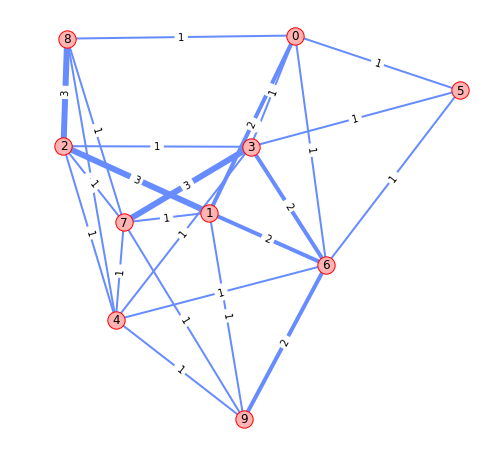

In [46]:
weight_d={(x,y):v for (x, y), v in Counter(Gm.edges()).items()}
w_edges=[(x,y,z) for (x,y),z in weight_d.items()]
Gw = nx.Graph()
Gw.add_weighted_edges_from(w_edges)
edge_width=[Gw[u][v]['weight'] for u,v in Gw.edges()]
elabels = nx.get_edge_attributes(Gw,'weight')
print "Is Gw multigraph?", Gw.is_multigraph()
print "Is Gw weighted?", nx.is_weighted(Gw)
print "Is Gw directed?", Gw.is_directed()
for k,v in elabels.items():
    print k,v

edge_width=[2*w for w in edge_width]
pos=nx.spring_layout(Gw) 
figsize=(8,8)

wpcplot(Gw,pos,node_color,edge_color,node_border_color,edge_width,elabels,figsize)

<a id='5.2'></a>
### 5.2 Random (gnm-based) DIRECTED Multigraphs

In [47]:
number_of_nodes = 10
number_of_edges = 25

# G=nx.gnm_random_graph(number_of_nodes,number_of_edges,directed=True)

while True:
    G=nx.gnm_random_graph(number_of_nodes,number_of_edges,directed=True)        
    if nx.number_weakly_connected_components(G)==1:
        break

print len(G.nodes()),len(G.edges())
if G.is_directed()==True:
    print "Directed graph"
else:
    print "Undirected graph"

10 25
Directed graph


In [48]:
# Number of additional multiedges:
k=10

edges = list(G.edges())
for _ in range(k):
    e=random.choice(list(G.edges()))
    edges.append(e)

Gm = nx.MultiDiGraph()

Gm.add_edges_from(edges)

print len(Gm.nodes()), len(Gm.edges())  

print "Is Gm multigraph?", Gm.is_multigraph()
print "Is Gm weighted?", nx.is_weighted(Gm)
print "Is Gm directed?", Gm.is_directed()

10 35
Is Gm multigraph? True
Is Gm weighted? False
Is Gm directed? True


In [49]:
Gm.graph['edge'] = {'arrowsize': '0.6', 'splines': 'curved'}
Gm.graph['graph'] = {'scale': '3'}
# for u,v,d in Gm.edges(data=True):
#     d['label'] = d.get('weight','')
A = to_agraph(Gm) 
A.layout('dot')                                                                 
A.draw('multi0_graphviz.png')

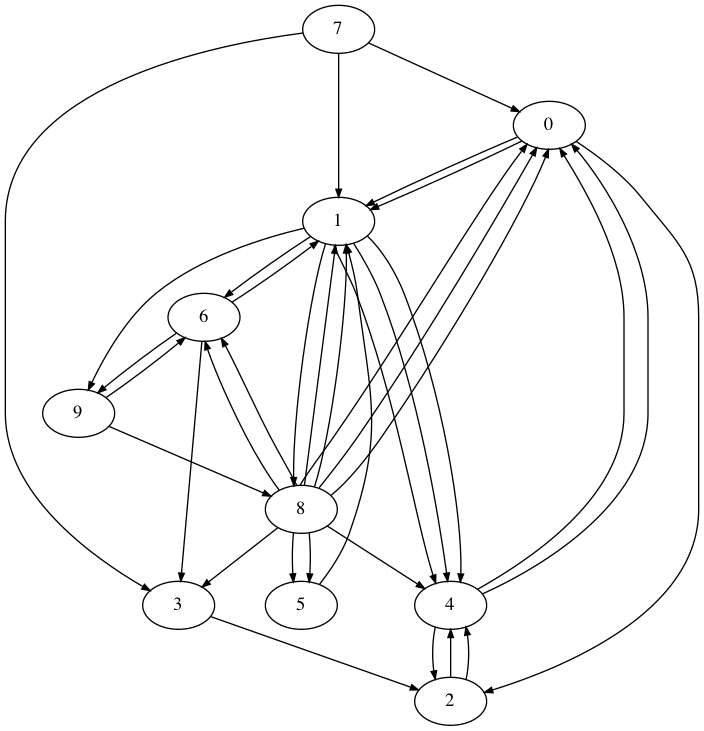

In [50]:
Image(filename = "multi0_graphviz.png") #, width=600, height=200)

Is Gw multigraph? False
Is Gw weighted? True
Is Gw directed? True
4 reciprocating edges: [(1, 8), (1, 6), (2, 4), (6, 9)]
(7, 3, {'weight': 1})
(6, 9, {'weight': 1})
(9, 8, {'weight': 1})
(8, 0, {'weight': 3})
(1, 6, {'weight': 1})
(5, 1, {'weight': 1})
(8, 5, {'weight': 2})
(4, 0, {'weight': 2})
(8, 1, {'weight': 2})
(6, 3, {'weight': 1})
(8, 6, {'weight': 2})
(3, 2, {'weight': 1})
(7, 1, {'weight': 1})
(1, 4, {'weight': 3})
(1, 9, {'weight': 1})
(4, 2, {'weight': 1})
(9, 6, {'weight': 1})
(0, 1, {'weight': 2})
(8, 3, {'weight': 1})
(7, 0, {'weight': 1})
(6, 1, {'weight': 1})
(0, 2, {'weight': 1})
(1, 8, {'weight': 1})
(2, 4, {'weight': 2})
(8, 4, {'weight': 1})


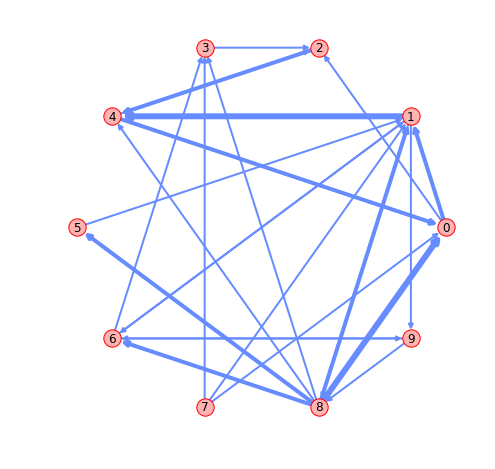

In [51]:
weight_l=[(x, y, {'weight': v}) for (x, y), v in Counter(Gm.edges()).items()]
Gw = nx.DiGraph(weight_l)
edge_width=[Gw[u][v]['weight'] for u,v in Gw.edges()]
elabels={}
print "Is Gw multigraph?", Gw.is_multigraph()
print "Is Gw weighted?", nx.is_weighted(Gw)
print "Is Gw directed?", Gw.is_directed()
rece=[]
for e in Gw.edges():
    if (e[1],e[0]) in Gw.edges():
        if (e[1],e[0]) not in rece:
            rece.append(e)
print len(rece), "reciprocating edges:", rece 
for i in weight_l:
    print i
         
edge_width=[2*w for w in edge_width]
pos=nx.circular_layout(Gw) 
figsize=(8,8)

wpcplot(Gw,pos,node_color,edge_color,node_border_color,edge_width,elabels,figsize)

In [52]:
Gw.graph['edge'] = {'arrowsize': '0.6', 'splines': 'curved'}
Gw.graph['graph'] = {'scale': '3'}
for u,v,d in Gw.edges(data=True):
    d['label'] = d.get('weight','')
A = to_agraph(Gw) 
A.layout('dot')                                                                 
A.draw('multi1_graphviz.png')

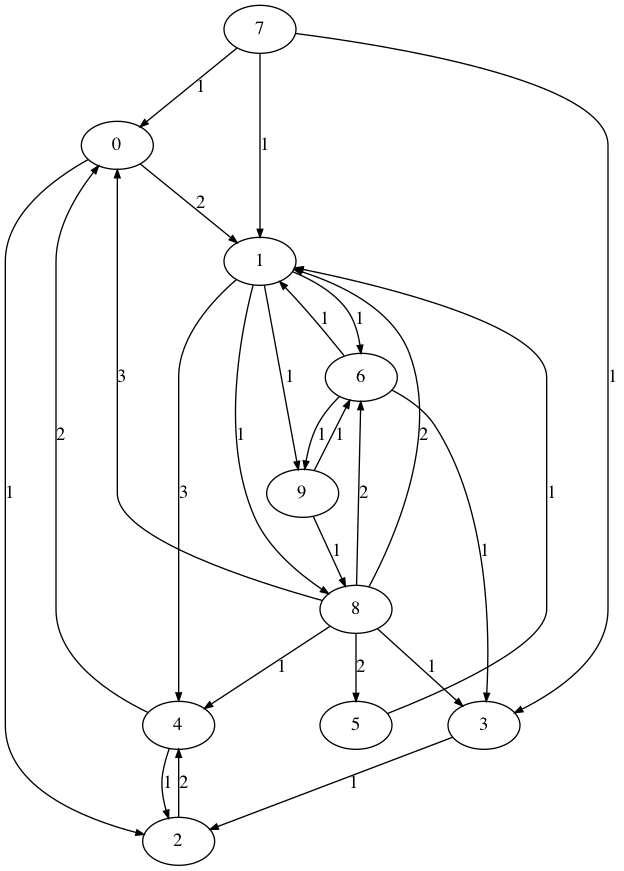

In [53]:
Image(filename = "multi1_graphviz.png") #, width=600, height=200)

<a id='6'></a>
## 6. Graph Isomorphisms

#### Petersen Graph

10 15


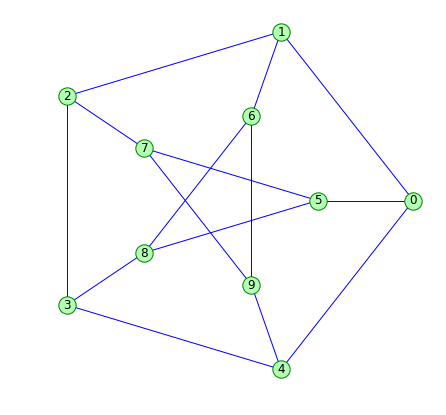

In [54]:
P=nx.petersen_graph()

pos=nx.shell_layout(P,nlist=[range(5,10), range(5)])
figsize=(7,7)
node_color="#b3ffb3" #"#ffb3b3"
node_border_color='g' #'r'
edge_color="b" #"#668cff"
pcplot(P,pos,node_color,edge_color,node_border_color,figsize)
print len(P.nodes()),len(P.edges())

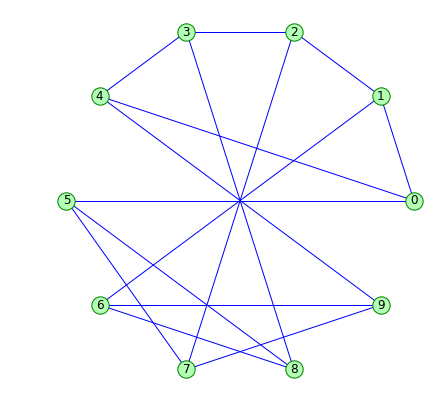

In [55]:
pos=nx.circular_layout(P)
pcplot(P,pos,node_color,edge_color,node_border_color,figsize)

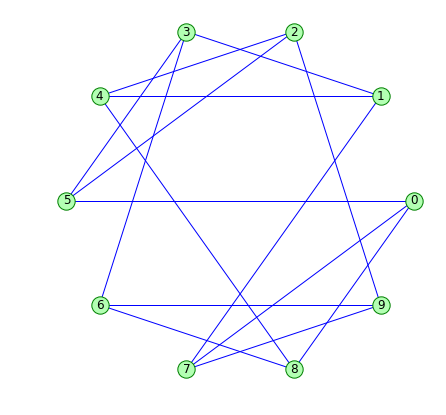

In [56]:
n=10
d=3
while True:
    G=nx.random_regular_graph(d, n)
#     G=nx.gnm_random_graph(number_of_nodes,number_of_edges,directed=False) 
    if nx.is_isomorphic(G,P):
        break
pcplot(G,pos,node_color,edge_color,node_border_color,figsize)

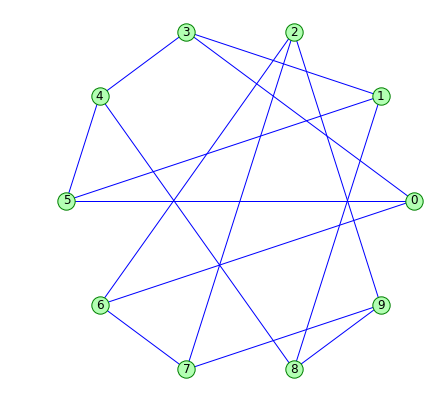

In [57]:
n=10
d=3
while True:
    G=nx.random_regular_graph(d, n)
#     G=nx.gnm_random_graph(number_of_nodes,number_of_edges,directed=False) 
    if nx.is_isomorphic(G,P)==False:
        break
pcplot(G,pos,node_color,edge_color,node_border_color,figsize)

#### Graphs with a given Degree Sequence

[4, 3, 6, 3, 4, 1, 1, 3, 3, 1, 2, 3, 1, 3, 2]

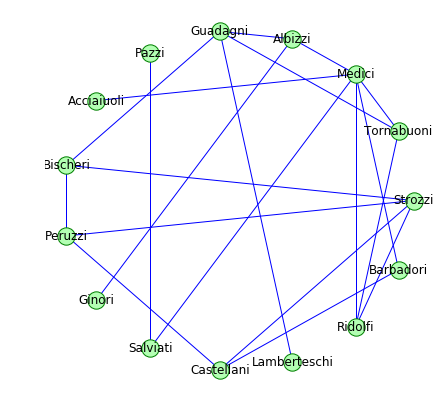

In [58]:
F=nx.florentine_families_graph()
pos = nx.circular_layout(F)
pcplot(F,pos,node_color,edge_color,node_border_color,figsize)
ds=[d for n, d in F.degree()]  
ds

In [59]:
# while True:
#     G = nx.configuration_model(ds)
#     mapping = dict(zip(G.nodes(),F.nodes()))
#     H = nx.relabel_nodes(G, mapping)
#     if nx.is_isomorphic(H,F):
#         break
# pcplot(H,pos,node_color,edge_color,node_border_color,figsize)

In [60]:
# nx.write_gpickle(G, "Florentine_iso.gpickle")

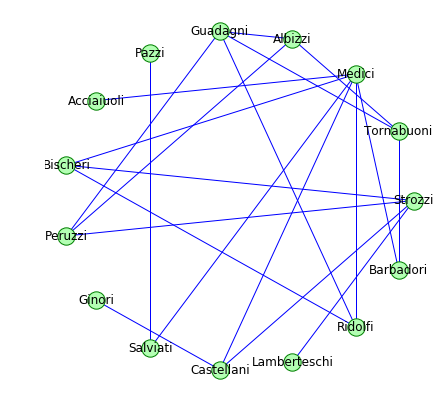

In [61]:
G = nx.read_gpickle("Florentine_iso.gpickle")
G.nodes()
mapping = dict(zip(G.nodes(),F.nodes()))
H = nx.relabel_nodes(G, mapping)
pos = nx.circular_layout(F)
pcplot(H,pos,node_color,edge_color,node_border_color,figsize)
ds=[d for n, d in H.degree()]  

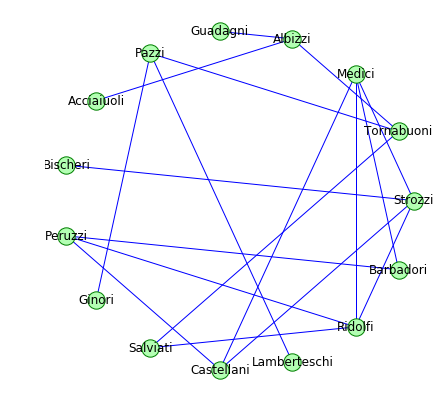

In [62]:
while True:
    G = nx.configuration_model(ds)
    mapping = dict(zip(G.nodes(),F.nodes()))
    H = nx.relabel_nodes(G, mapping)
    if nx.is_isomorphic(H,F)==False:
        break
pcplot(H,pos,node_color,edge_color,node_border_color,figsize)

[4, 3, 6, 3, 4, 1, 1, 3, 3, 1, 2, 3, 1, 3, 2]

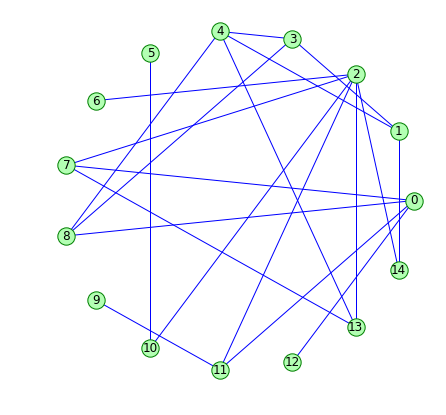

In [63]:
# sequence = nx.random_powerlaw_tree_sequence(20, tries=5000)
# G1 = nx.configuration_model(sequence)
# # actual_degrees = [d for v, d in G1.degree()]
# # print actual_degrees
# # actual_degrees == sequence
G1 = nx.read_gpickle("CM20.gpickle")
pos=nx.circular_layout(G1)
pcplot(G1,pos,node_color,edge_color,node_border_color,figsize)
ds=[d for n, d in G1.degree()]  
ds

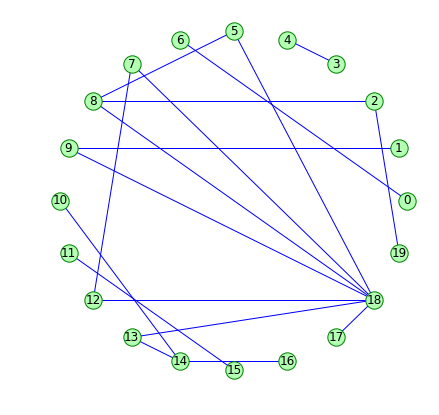

In [64]:
# while True:
#     G2 = nx.configuration_model(sequence)
#     if nx.is_isomorphic(G1,G2):
#         break
G2=nx.read_gpickle("CM20iso.gpickle")
pos=nx.circular_layout(G2)
pcplot(G2,pos,node_color,edge_color,node_border_color,figsize)

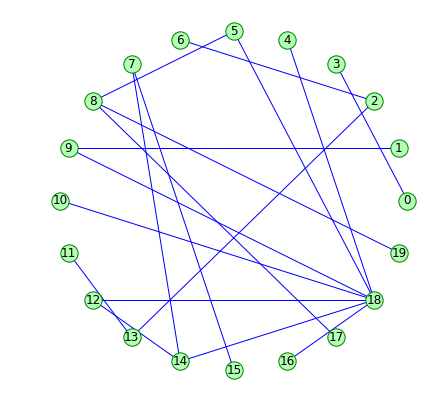

In [65]:
# while True:
#     G2n = nx.configuration_model(sequence)
#     if nx.is_isomorphic(G1,G2n)==False:
#         break
G2n=nx.read_gpickle("CM20noniso.gpickle")
pos=nx.circular_layout(G2n)
pcplot(G2n,pos,node_color,edge_color,node_border_color,figsize)

In [66]:
# nx.write_gpickle(G, "CM20.gpickle")
# nx.write_gpickle(G2, "CM20iso.gpickle")
# nx.write_gpickle(G2n, "CM20noniso.gpickle")

[3, 2, 1, 1, 2, 1, 3, 2, 1, 1, 1, 7, 1, 1, 1]

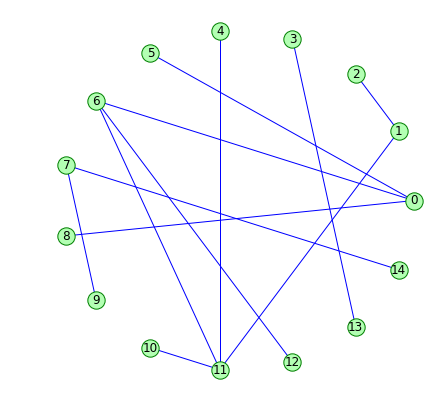

In [67]:
sequence = nx.random_powerlaw_tree_sequence(15, tries=5000)
G1 = nx.configuration_model(sequence)
pos=nx.circular_layout(G1)
pcplot(G1,pos,node_color,edge_color,node_border_color,figsize)
ds=[d for n, d in G1.degree()]  
ds

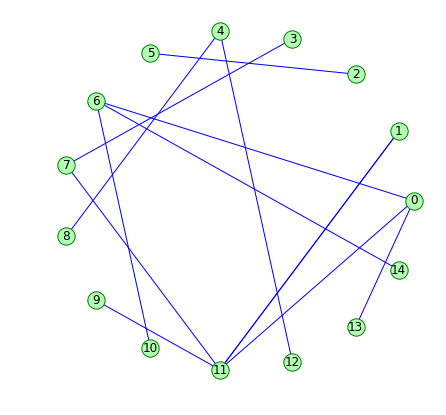

In [68]:
while True:
    G2 = nx.configuration_model(sequence)
    if nx.is_isomorphic(G1,G2):
        break
pcplot(G2,pos,node_color,edge_color,node_border_color,figsize)

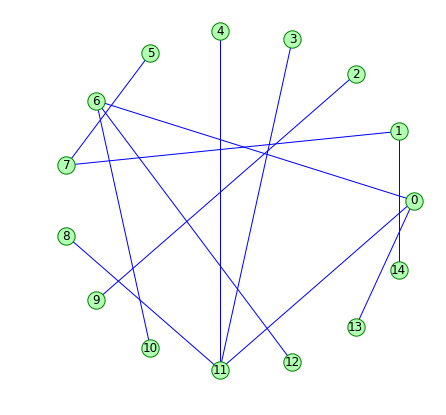

In [69]:
while True:
    G2 = nx.configuration_model(sequence)
    if nx.is_isomorphic(G1,G2)==False:
        break
pcplot(G2,pos,node_color,edge_color,node_border_color,figsize)